# Data 606 - Capstone Project
###Movie Recommendation System

Goal of this project: To explore recommendation system on the movie dataset with both content-based method and collaborative method using Machine Learning Algorithms. 

Outline for this project:
1. EDA
2. Data prep. Singular Value Decomposition (SVD)atioNeural network-based Collaborative Filtering(NCF)tering

### Collaborative Filtering (Singular Value Decomposition)


In [19]:
from surprise import SVD, accuracy, SVDpp
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
path='C:\\Users\\kamho\\OneDrive\\Documents\\GitHub\\movieRecommendationSystem\\MRS_repo\\data\\raw\\Data3_movielens\\'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'

In [2]:
df_rating = pd.read_csv(os.path.join(path, ratings_filename))
df_movies = pd.read_csv(os.path.join(path, movies_filename))


In [3]:
df_rating.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

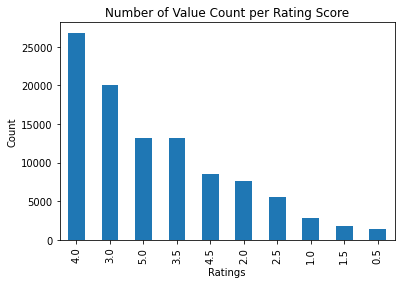

In [4]:
df_rating.rating.value_counts().plot(kind='bar')
plt.title('Number of Value Count per Rating Score')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#Check if there is null value in the df_rating dataset
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
#Drop the timestamp column as we don't need for SVD
df_rating = df_rating.drop(columns='timestamp')
df_rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
#Loading the df_rating from a pandas dataframe using load_from_df() method and reader object
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(df_rating[['userId', 'movieId', 'rating']], reader)

In [10]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.20)

#### SVD algorithm is equivalent to Probabilistic Matrix Factorization

In [11]:
#Using the SVD algorithm
algo = SVD()
#Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [12]:
predictions = algo.test(testset)

In [13]:
accuracy.rmse(predictions)

RMSE: 0.8697


0.8696769355961265

#### The SVDpp algorithm is an extension of SVD that takes into account implicit ratings which has been used in netflix competition.

In [20]:
#Using The SVD++ algo
algo= SVDpp()

#train the dataset on the SVD++ algo
algo.fit(trainset)

In [21]:
predictions = algo.test(testset)

In [22]:
accuracy.rmse(predictions)

RMSE: 0.8556


0.8555557924955981

In [ ]:
#Create the rating matrix with rows as movies and columns as users
ratings_matrix = np.ndarray(shape=(np.max(df_rating.movieId.values), np.max(df_rating.userId.values)),dtype=np.int32)
ratings_matrix[df_rating.movieId.values-1, df_rating.userId.values-1] = df_rating.rating.values

In [ ]:
ratings_matrix

In [ ]:
#Normalize the matrix 
normalized_ratings_matrix = (ratings_matrix-ratings_matrix.min())/(ratings_matrix.max() - ratings_matrix.min())
normalized_ratings_matrix

In [ ]:
#Normalize the matrix with L1
from sklearn import preprocessing

normalized_ratings_mat_scikit = preprocessing.normalize(ratings_matrix, norm= "l1")
print(normalized_ratings_mat_scikit)

In [ ]:
#Normalize the matrix.
normalized_matrix = ratings_matrix - np.asarray([(np.mean(ratings_matrix, 1))]).T
normalized_matrix

In [ ]:
A = normalized_matrix.T / np.sqrt(ratings_matrix.shape[0] - 1)
U, S, V = np.linalg.svd(A)